In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/Temp_Provincias.csv', sep=';', decimal='.')

In [4]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,01/01/2018,Madrid,11.6,3.6
1,02/01/2018,Madrid,13.4,7.5
2,03/01/2018,Madrid,13.5,7.6
3,04/01/2018,Madrid,13.7,7.8
4,05/01/2018,Madrid,11.5,5.8


In [5]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [6]:
df.set_index('FECHA').resample('W')

In [7]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,2018-01-01,Madrid,11.6,3.6
1,2018-01-02,Madrid,13.4,7.5
2,2018-01-03,Madrid,13.5,7.6
3,2018-01-04,Madrid,13.7,7.8
4,2018-01-05,Madrid,11.5,5.8


In [8]:
df.columns

Index(['FECHA', 'Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [9]:
df = df.set_index('FECHA')
df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Madrid,11.6,3.6
2018-01-02,Madrid,13.4,7.5
2018-01-03,Madrid,13.5,7.6
2018-01-04,Madrid,13.7,7.8
2018-01-05,Madrid,11.5,5.8


In [10]:
mallorca_df = df[df["Provincia"] == "Mallorca"]
#df[valencia_df]

In [11]:
mallorca_df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Mallorca,22.7,10.8
2018-01-02,Mallorca,19.0,13.1
2018-01-03,Mallorca,22.4,13.7
2018-01-04,Mallorca,22.7,13.4
2018-01-05,Mallorca,18.3,10.2


In [12]:
mallorca_df.columns

Index(['Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [13]:
mallorca_df['Temp_Media'] = mallorca_df[['T. Máxima','T.Mínima']].mean(axis=1)
mallorca_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Mallorca,22.7,10.8,16.75
2018-01-02,Mallorca,19.0,13.1,16.05
2018-01-03,Mallorca,22.4,13.7,18.05
2018-01-04,Mallorca,22.7,13.4,18.05
2018-01-05,Mallorca,18.3,10.2,14.25


In [14]:
mallorca_df.head()

,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Mallorca,22.7,10.8,16.75
2018-01-02,Mallorca,19.0,13.1,16.05
2018-01-03,Mallorca,22.4,13.7,18.05
2018-01-04,Mallorca,22.7,13.4,18.05
2018-01-05,Mallorca,18.3,10.2,14.25


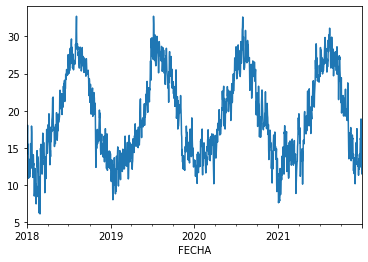

In [15]:
mallorca_df['Temp_Media'].plot()

In [16]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':mallorca_df.index,'y':mallorca_df.Temp_Media})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,16.75
2018-01-02,2018-01-02,16.05
2018-01-03,2018-01-03,18.05
2018-01-04,2018-01-04,18.05
2018-01-05,2018-01-05,14.25


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


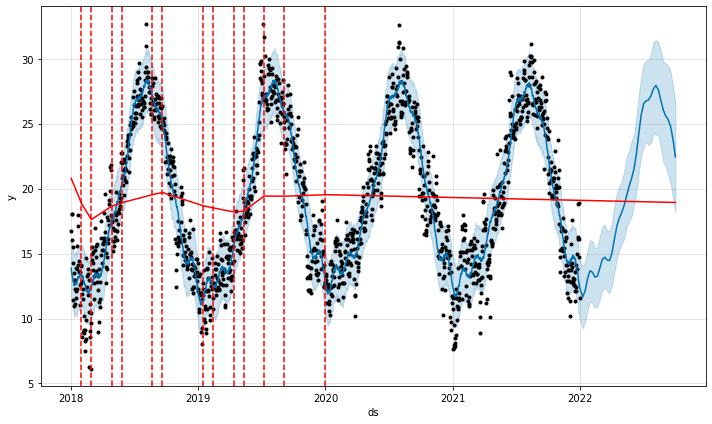

In [17]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=40, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [18]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,13.878496,11.570092,16.267737
1,2018-01-02,13.613605,11.448627,15.907062
2,2018-01-03,13.395307,11.030862,15.783864
3,2018-01-04,13.391268,10.977550,15.642308
4,2018-01-05,13.124714,10.950414,15.567686


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1496,2022-09-04,18.951883,21.686899,29.648614,15.587888,22.023903,6.654043,6.654043,6.654043,0.147872,0.147872,0.147872,6.506171,6.506171,6.506171,0.0,0.0,0.0,25.605927
1497,2022-09-11,18.947700,21.065726,29.443601,15.417715,22.154010,6.376790,6.376790,6.376790,0.147872,0.147872,0.147872,6.228918,6.228918,6.228918,0.0,0.0,0.0,25.324490
1498,2022-09-18,18.943517,20.434804,29.039414,15.237033,22.243635,5.877923,5.877923,5.877923,0.147872,0.147872,0.147872,5.730051,5.730051,5.730051,0.0,0.0,0.0,24.821440
1499,2022-09-25,18.939333,19.250386,27.933228,15.073110,22.405642,4.888728,4.888728,4.888728,0.147872,0.147872,0.147872,4.740856,4.740856,4.740856,0.0,0.0,0.0,23.828061
1500,2022-10-02,18.935150,18.174155,26.640477,14.944992,22.544297,3.510887,3.510887,3.510887,0.147872,0.147872,0.147872,3.363015,3.363015,3.363015,0.0,0.0,0.0,22.446037


In [20]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('temp_mallorca.csv',  index=False, sep=";", decimal=",")